In [4]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data_train = pd.read_csv(r'C:\Users\91944\Downloads\tweets\train.csv', encoding='utf-8')
data_test = pd.read_csv(r'C:\Users\91944\Downloads\tweets\test.csv', encoding='utf-8')

X_train = data_train.Text.tolist()
X_test = data_test.Text.tolist()

y_train = data_train.Emotion.tolist()
y_test = data_test.Emotion.tolist()

data = pd.concat([data_train,data_test], ignore_index=True)

class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

print('size of training set: %s' % (len(data_train['Text'])))
print('size of validation set: %s' % (len(data_test['Text'])))
print(data.Emotion.value_counts())

data.head(10)

size of training set: 7934
size of validation set: 3393
Emotion
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: count, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
5,sadness,When my family heard that my Mother's cousin w...
6,joy,Finding out I am chosen to collect norms for C...
7,anger,A spokesperson said : ` Glen is furious that t...
8,neutral,Yes .
9,sadness,"When I see people with burns I feel sad, actua..."


In [6]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'neutral': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [7]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [8]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350


c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [9]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [9]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Train on 7934 samples, validate on 3393 samples
Epoch 1/3
7934/7934 [==============================] - 475s 60ms/sample - loss: 0.9311 - acc: 0.6364 - val_loss: 0.5669 - val_acc: 0.8034
Epoch 2/3
7934/7934 [==============================] - 466s 59ms/sample - loss: 0.4569 - acc: 0.8470 - val_loss: 0.5211 - val_acc: 0.8232
Epoch 3/3
7934/7934 [==============================] - 466s 59ms/sample - loss: 0.1911 - acc: 0.9411 - val_loss: 0.5589 - val_acc: 0.8320


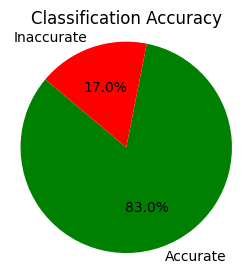

In [1]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the accuracy
accuracy = 0.83  # Replace with your actual accuracy value

# Calculate the percentage of accuracy and inaccuracy
accurate_percent = accuracy * 100
inaccurate_percent = 100 - accurate_percent

# Labels for the pie chart segments
labels = ['Accurate', 'Inaccurate']

# Sizes of each segment
sizes = [accurate_percent, inaccurate_percent]

# Colors for each segment
colors = ['green', 'red']

# Create a pie chart
plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Classification Accuracy')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [10]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

         joy       0.87      0.85      0.86       707
     sadness       0.84      0.79      0.82       676
        fear       0.86      0.87      0.86       679
       anger       0.81      0.80      0.81       693
     neutral       0.78      0.85      0.81       638

    accuracy                           0.83      3393
   macro avg       0.83      0.83      0.83      3393
weighted avg       0.83      0.83      0.83      3393



array([[598,   8,  15,  13,  73],
       [ 18, 537,  37,  54,  30],
       [ 16,  20, 590,  40,  13],
       [ 19,  49,  35, 557,  33],
       [ 37,  24,  12,  24, 541]])

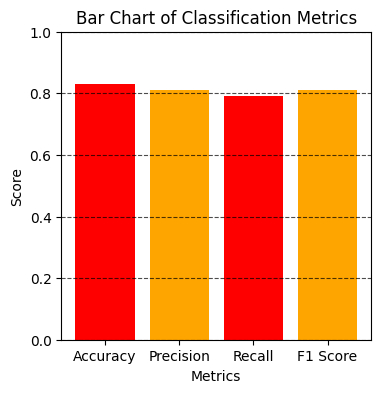

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for accuracy, precision, recall, and F1 score
accuracy = 0.83
precision = 0.81
recall= 0.79
f1_score=0.81

metrics = [accuracy, precision, recall, f1_score]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar chart
plt.figure(figsize=(4,4))
plt.bar(labels, metrics, color=['red', 'orange', 'red', 'orange'])
plt.ylim(0,1)  # Set the y-axis limit from 0 to 1 (assuming metrics are in the range [0, 1])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Bar Chart of Classification Metrics')
plt.grid(axis='y', linestyle='--', color='black',alpha=0.7)
plt.show()

In [9]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['joy', 'sadness', 'fear', 'anger', 'neutral']

In [11]:
import time 

message = 'I guess so'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: neutral (3.38)


In [12]:
# let's save the predictor for later use
predictor.save("models/bert_model")

c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
